In [9]:
%run functions/cytoscapeFunctions
%run functions/edgeFunctions
%run functions/springLayoutJN1
# %run functions/dashFunc

In [10]:
from py2cytoscape import cyrest
import networkx as nx
import numpy as np
import pandas as pd
import random
import tempfile
from networkx.generators.random_graphs import barabasi_albert_graph as ba
import os
import time

In [11]:
G = nx.gnm_random_graph(10000,30000)

In [12]:
networkFolder = os.path.join(os.path.dirname(os.path.abspath("template.cys")), 'networks')
networkFolder

GMP = os.path.join(networkFolder, 'GMP')
Prog = os.path.join(networkFolder, 'Progenitor')

GMPedge = os.path.join(GMP, 'edge.tsv')
GMPnode = os.path.join(GMP, 'node.tsv')

ProgEdge = os.path.join(Prog, 'edge.tsv')
ProgNode = os.path.join(Prog, 'node.tsv')

gmpEdgeDF = pd.read_csv(GMPedge, delimiter = '\t')
gmpNodeDF = pd.read_csv(GMPnode, delimiter = '\t')
progEdgeDF = pd.read_csv(ProgEdge, delimiter = '\t')
progNodeDF = pd.read_csv(ProgNode, delimiter = '\t')

gmpNetwork = nx.Graph()
gmpOverlap = 0

for i in range (len(gmpEdgeDF)):
    if gmpNetwork.has_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i]):
        gmpOverlap += 1
    gmpNetwork.add_edge(gmpEdgeDF['Regulator'][i], gmpEdgeDF['Target'][i])
    
progNetwork = nx.Graph()

progOverlap = 0

for i in range (len(progEdgeDF)):
    if progNetwork.has_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i]):
        progOverlap += 1
    progNetwork.add_edge(progEdgeDF['Regulator'][i], progEdgeDF['Target'][i])

print(gmpOverlap, progOverlap)    

gmpNodeIndexDF = gmpNodeDF.set_index('Name')
progNodeIndexDF = progNodeDF.set_index('Name')

nx.set_node_attributes(gmpNetwork, gmpNodeDF.to_dict('index'))
nx.set_node_attributes(gmpNetwork, gmpNodeIndexDF.to_dict('index'))

gmpNetwork1 = gmpNetwork.copy()
# gmpNetwork1.remove_node('IRF7')

nx.set_node_attributes(progNetwork, progNodeDF.to_dict('index'))
nx.set_node_attributes(progNetwork, progNodeIndexDF.to_dict('index'))

32 10


In [13]:
addEdgeAttrib(gmpNetwork, 'weight', 0.1, 1)
addEdgeAttrib(progNetwork, 'weight', 0.1, 1)


In [14]:
progLayout = fruchterman_reingold_layout_edit(progNetwork, iterations = 50, seed = 1, pretendIterations=1000, stop = 100)
gmpLayout = fruchterman_reingold_layout_edit(gmpNetwork, iterations = 50, seed = 1, pretendIterations=1000, stop = 100)

In [21]:
len(progLayout)

190

In [34]:
conformEdges(gmpNetwork,progNetwork)
networks = fillBetweenEdges(progNetwork,gmpNetwork, 10)
deleteZeroWeights(networks)
deleteLoneListNodes(networks)

In [41]:
network1Layout = fruchterman_reingold_layout_edit(networks[1], iterations = 50, seed = 1, pretendIterations = 1000, stop = 150)

In [46]:
network1Layout

{'BRCA1': array([-0.00747104, -0.07171666]),
 'ASF1B': array([-0.95447598, -0.33528826]),
 'ATAD5': array([-0.00789085, -0.0780223 ]),
 'CDC45': array([-0.006226  , -0.06918404]),
 'CDCA5': array([-0.00512789, -0.07451545]),
 'CENPM': array([-0.14488215,  0.97257652]),
 'CENPU': array([-0.60922478,  0.7849648 ]),
 'CENPW': array([-0.00993851, -0.07091701]),
 'CHAF1A': array([-0.00815901, -0.0729906 ]),
 'CKS1B': array([-0.00540345, -0.07754221]),
 'CLSPN': array([-0.00951857, -0.06897206]),
 'DEK': array([-0.00906704, -0.07310375]),
 'DHFR': array([0.70611223, 0.69748508]),
 'DNAJC9': array([-0.01125966, -0.07027592]),
 'DNMT1': array([-0.00510223, -0.07031151]),
 'DUT': array([-1.        , -0.11220171]),
 'FAM111B': array([-0.00434056, -0.07491093]),
 'FANCD2': array([-0.00816633, -0.07382965]),
 'FEN1': array([-0.01082801, -0.07182965]),
 'GGH': array([-0.00562995, -0.07340771]),
 'GINS2': array([-0.00951229, -0.07182904]),
 'H2AFZ': array([-0.46034575,  0.87521726]),
 'HELLS': array

In [43]:
def formatPos(nodes, layout, multiplier):
    names = list(layout.keys())
    coords = list(layout.values())
    nodeData = list(nodes)
    elements = []
    
    for element in range(len(layout)):
        classes = ''
        shift = 0
        for attrib in range (len(nodeData[element][1])):
                classes = classes + ' ' + list(nodeData[element][attrib+1].values())[0]
        
        elements.append({'data':{'id':names[element], 'label': names[element]}, 'position': {'x':coords[element][0]*multiplier, 'y':coords[element][1]*multiplier}, 'classes': classes})
        
    
    return elements

In [45]:
formatPos(networks[1].nodes(data = True), network1Layout, 1000)

[{'data': {'id': 'BRCA1', 'label': 'BRCA1'},
  'position': {'x': -7.4710449605764335, 'y': -71.71666242859109},
  'classes': ' TF'},
 {'data': {'id': 'ASF1B', 'label': 'ASF1B'},
  'position': {'x': -954.4759830731675, 'y': -335.2882593735921},
  'classes': ' normal'},
 {'data': {'id': 'ATAD5', 'label': 'ATAD5'},
  'position': {'x': -7.890848046961938, 'y': -78.02229549169869},
  'classes': ' normal'},
 {'data': {'id': 'CDC45', 'label': 'CDC45'},
  'position': {'x': -6.226004797335314, 'y': -69.18403615712404},
  'classes': ' normal'},
 {'data': {'id': 'CDCA5', 'label': 'CDCA5'},
  'position': {'x': -5.127889328288779, 'y': -74.51545479615665},
  'classes': ' normal'},
 {'data': {'id': 'CENPM', 'label': 'CENPM'},
  'position': {'x': -144.8821492613875, 'y': 972.5765156879538},
  'classes': ' normal'},
 {'data': {'id': 'CENPU', 'label': 'CENPU'},
  'position': {'x': -609.2247798727494, 'y': 784.9647991235098},
  'classes': ' normal'},
 {'data': {'id': 'CENPW', 'label': 'CENPW'},
  'posit

In [35]:
convertEdge(networks[0])

source target    weight
0     BRCA1  ASF1B  0.000000
1     BRCA1  ATAD5  0.119142
2     BRCA1  CDC45  0.534147
3     BRCA1  CDCA5  0.291113
4     BRCA1  CENPM  0.000000
..      ...    ...       ...
994    CD3E   LEF1  0.823869
995    CD3E   TCF7  0.564784
996    IL7R   LEF1  0.172702
997    IL7R   TCF7  0.160805
998  SPOCK2   LEF1  0.135412

[999 rows x 3 columns]

In [36]:
convertEdge(networks[1])

source target    weight
0     BRCA1  ASF1B  0.000000
1     BRCA1  ATAD5  0.168817
2     BRCA1  CDC45  0.488188
3     BRCA1  CDCA5  0.314725
4     BRCA1  CENPM  0.000000
..      ...    ...       ...
994    CD3E   LEF1  0.841531
995    CD3E   TCF7  0.549894
996    IL7R   LEF1  0.230891
997    IL7R   TCF7  0.169078
998  SPOCK2   LEF1  0.165389

[999 rows x 3 columns]

In [37]:
convertEdge(networks[2])

source target    weight
0     BRCA1  ASF1B  0.000000
1     BRCA1  ATAD5  0.218491
2     BRCA1  CDC45  0.442229
3     BRCA1  CDCA5  0.338337
4     BRCA1  CENPM  0.000000
..      ...    ...       ...
994    CD3E   LEF1  0.859192
995    CD3E   TCF7  0.535004
996    IL7R   LEF1  0.289079
997    IL7R   TCF7  0.177351
998  SPOCK2   LEF1  0.195366

[999 rows x 3 columns]

In [40]:
convertEdge(progNetwork)

source target    weight
0     BRCA1  ASF1B  0.000000
1     BRCA1  ATAD5  0.119142
2     BRCA1  CDC45  0.534147
3     BRCA1  CDCA5  0.291113
4     BRCA1  CENPM  0.000000
..      ...    ...       ...
994    CD3E   LEF1  0.823869
995    CD3E   TCF7  0.564784
996    IL7R   LEF1  0.172702
997    IL7R   TCF7  0.160805
998  SPOCK2   LEF1  0.135412

[999 rows x 3 columns]

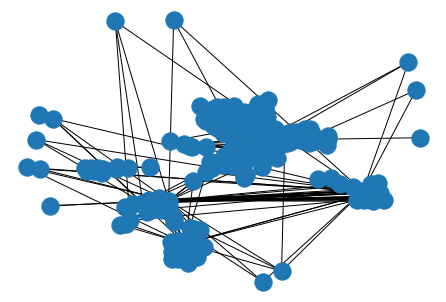

In [39]:
nx.draw(networks[2])

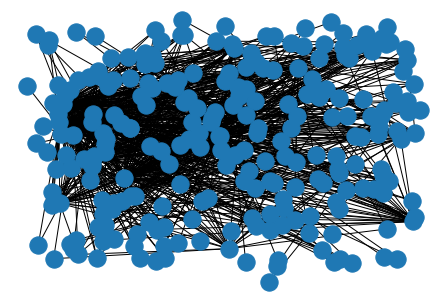

In [6]:
layout = fruchterman_reingold_layout_edit(gmpNetwork, seed = 1, iterations = 1000, pretendIterations = 50, stop = 10)
nx.draw(gmpNetwork, pos = layout)

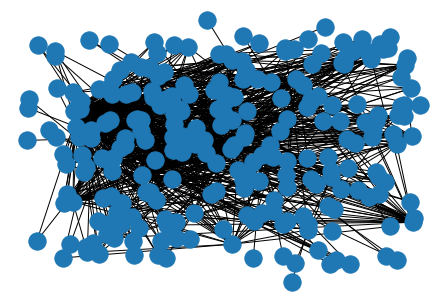

In [7]:
layout1 = fruchterman_reingold_layout_edit(gmpNetwork, seed = 1, pos = layout, iterations = 1000, pretendIterations = 50, stop = 10)
nx.draw(gmpNetwork, pos = layout1)

In [8]:
adj = list(gmpNetwork.adjacency())

In [9]:
adj
next(item for item in adj if item)

('BCL11A',
 {'CSTA': {},
  'IL3RA': {},
  'IRF7': {},
  'LYZ': {},
  'MZB1': {},
  'RNASE2': {},
  'SPIB': {},
  'TCF4': {}})

In [10]:
adj2 = nx.to_dict_of_lists(gmpNetwork)

In [11]:
adj2['BCL11A']

['CSTA', 'IL3RA', 'IRF7', 'LYZ', 'MZB1', 'RNASE2', 'SPIB', 'TCF4']

In [12]:
adj3 = nx.to_dict_of_dicts(gmpNetwork)
type(adj3['BCL11A'])

dict

In [13]:
def formatPos(nodes, layout, multiplier, containsNodeData):
    names = list(layout.keys())
    coords = list(layout.values())
    nodeData = list(nodes)
    elements = []
        
    for element in range(len(layout)):
        classes = ''
        shift = 0
        if containsNodeData == True:
            shift = 1
        else:
            shift = 2
        for attrib in range (len(nodeData[0])-shift):
                classes = classes + ' ' + list(nodeData[element][attrib+1].values())[0]
        
        elements.append({'data':{'id':names[element], 'label': names[element]}, 'position': {'x':coords[element][0]*multiplier, 'y':coords[element][1]*multiplier}, 'classes': classes})
        
    
    return elements


def formatEdge(edges):
    edgeList = []
    
    for edge in range (len(edges)):
        edgeList.append({'data':{'source':edges[edge][0], 'target':edges[edge][1], 'label': str(edges[edge][0]) + ' to ' + str(edges[edge][1])}})
    
    return edgeList


def makeFrames(network, numFrames, inIterations, inPretendIterations, inStop):
    posList = []
    layout = fruchterman_reingold_layout_edit(network, seed = 1, iterations = inIterations, pretendIterations = inPretendIterations, stop = inStop)
    for frame in range(numFrames):
        if frame == 0:
            posList.append(layout)
        else:
            nextLayout = fruchterman_reingold_layout_edit(network, seed = 1, iterations = inIterations, pretendIterations = inPretendIterations, pos = layout, stop = inStop)
            posList.append(nextLayout)
            layout = nextLayout
    
    
    return posList


def formatPosList(network, posList, multiplier, containsNodeData):
#     takes a list of dicts and formats it to work in Dash
    dashList = []
    for frame in range(len(posList)):
        dashList.append(formatPos(network.nodes(data = True), posList[frame], multiplier, containsNodeData))
        
    return dashList

In [14]:
coordFrames = (makeFrames(gmpNetwork, 10, 1000, 50, 10))

In [15]:
frame1 = coordFrames[0]

In [16]:
frame2 = coordFrames[1]
frame3 = coordFrames[2]

In [17]:
def genBetweenFrames(frameData1, frameData2, numFrames):
#     could optimize by doing linspace once for each node instead of once for each node for each frame
    betweenFrames = []

    for frameNum in range(numFrames):
        newFrame = {}
        for name in frameData1:
            newFrame[name] = np.linspace(frameData1[name],frameData2[name],numFrames)[frameNum]
        betweenFrames.append(newFrame)
    
    return betweenFrames

In [18]:
startTime = time.time()
frames1 = genBetweenFrames(frame1,frame2,10)
frames2 = genBetweenFrames(frame2,frame3, 10)
print(time.time()-startTime)

0.13984131813049316


In [19]:
interpolatedFrames = []
for frame in range(len(coordFrames)-1):
    interpolatedFrames.extend(genBetweenFrames(coordFrames[frame],coordFrames[frame+1], 10))

In [20]:
formatPosList(gmpNetwork, interpolatedFrames, 1000, True)

[[{'data': {'id': 'BCL11A', 'label': 'BCL11A'},
   'position': {'x': -157.41832749985838, 'y': 287.4188836378131},
   'classes': ' TF'},
  {'data': {'id': 'CSTA', 'label': 'CSTA'},
   'position': {'x': -773.0498082324112, 'y': -375.73066243597555},
   'classes': ' normal'},
  {'data': {'id': 'IL3RA', 'label': 'IL3RA'},
   'position': {'x': -541.9633303462318, 'y': -711.8957030821279},
   'classes': ' normal'},
  {'data': {'id': 'IRF7', 'label': 'IRF7'},
   'position': {'x': -445.96034467339274, 'y': -273.94276498805743},
   'classes': ' TF'},
  {'data': {'id': 'LYZ', 'label': 'LYZ'},
   'position': {'x': -106.55275916606617, 'y': -59.43956343045011},
   'classes': ' normal'},
  {'data': {'id': 'MZB1', 'label': 'MZB1'},
   'position': {'x': -178.47507524382127, 'y': 257.8853257383505},
   'classes': ' normal'},
  {'data': {'id': 'RNASE2', 'label': 'RNASE2'},
   'position': {'x': -430.1666218662035, 'y': 572.9275760853176},
   'classes': ' normal'},
  {'data': {'id': 'SPIB', 'label': 'SP

In [21]:
interpolatedFrames[89]

{'BCL11A': array([-0.13918093, -0.15480203]),
 'CSTA': array([-0.33187913, -0.35340702]),
 'IL3RA': array([-0.24264657, -0.49168445]),
 'IRF7': array([0.00845403, 0.05748186]),
 'LYZ': array([ 0.07164926, -0.19113376]),
 'MZB1': array([-0.06631063, -0.04208889]),
 'RNASE2': array([-0.03813411,  0.18148723]),
 'SPIB': array([-0.2133949 ,  0.12121381]),
 'TCF4': array([ 0.07717512, -0.05817975]),
 'CEBPB': array([-0.15038315, -0.19914622]),
 'CD14': array([0.36598226, 0.53447245]),
 'FCN1': array([ 0.01299681, -0.02799262]),
 'MNDA': array([0.49469338, 0.40687601]),
 'S100A11': array([-0.53021452, -0.64175602]),
 'S100A6': array([-0.24010654,  0.13480845]),
 'S100A8': array([ 0.08960849, -0.19991093]),
 'S100A9': array([ 0.43340184, -0.11145534]),
 'VCAN': array([-0.05947193, -0.14422281]),
 'CEBPD': array([ 0.08250705, -0.04840097]),
 'ADA': array([-0.34159302,  0.18039315]),
 'ANXA1': array([0.61525112, 0.37821987]),
 'ANXA2': array([-0.12921854, -0.13156865]),
 'BLNK': array([ 0.12093

In [28]:
data = convertEdge(gmpNetwork)

In [29]:
data

source    target
0    BCL11A      CSTA
1    BCL11A     IL3RA
2    BCL11A      IRF7
3    BCL11A       LYZ
4    BCL11A      MZB1
..      ...       ...
752   MYBL2  TMEM106C
753   MYBL2      TYMS
754   MYBL2     ZWINT
755    XBP1   HSP90B1
756    XBP1     HSPA5

[757 rows x 2 columns]

In [62]:
addEdgeAttrib(gmpNetwork, 'weight', 1, 10)

In [67]:
edges=convertEdge(gmpNetwork)

In [69]:
edges

source    target    weight
0    BCL11A      CSTA  9.059783
1    BCL11A     IL3RA  8.328113
2    BCL11A      IRF7  5.275716
3    BCL11A       LYZ  5.704070
4    BCL11A      MZB1  9.358692
..      ...       ...       ...
752   MYBL2  TMEM106C  2.305174
753   MYBL2      TYMS  3.154037
754   MYBL2     ZWINT  4.128158
755    XBP1   HSP90B1  9.736738
756    XBP1     HSPA5  4.655543

[757 rows x 3 columns]

In [71]:
def formatEdge(edges):
    edgeList = []
    
    for edge in range (len(edges)):
        if 'weight' in edges.columns:
            edgeList.append({'data':{'source':edges['source'][edge], 'target':edges['target'][edge], 'label': str(edges['source'][edge]) + ' to ' + str(edges['target'][edge]), 'weight': edges['weight'][edge]}})
        else:
            edgeList.append({'data':{'source':edges['source'][edge], 'target':edges['target'][edge], 'label': str(edges['source'][edge]) + ' to ' + str(edges['target'][edge])}})


    return edgeList

In [72]:
formatEdge(edges)

[{'data': {'source': 'BCL11A',
   'target': 'CSTA',
   'label': 'BCL11A to CSTA',
   'weight': 9.059782993808865}},
 {'data': {'source': 'BCL11A',
   'target': 'IL3RA',
   'label': 'BCL11A to IL3RA',
   'weight': 8.32811251772138}},
 {'data': {'source': 'BCL11A',
   'target': 'IRF7',
   'label': 'BCL11A to IRF7',
   'weight': 5.2757160775829}},
 {'data': {'source': 'BCL11A',
   'target': 'LYZ',
   'label': 'BCL11A to LYZ',
   'weight': 5.7040697178972515}},
 {'data': {'source': 'BCL11A',
   'target': 'MZB1',
   'label': 'BCL11A to MZB1',
   'weight': 9.358692410724121}},
 {'data': {'source': 'BCL11A',
   'target': 'RNASE2',
   'label': 'BCL11A to RNASE2',
   'weight': 4.908520945733923}},
 {'data': {'source': 'BCL11A',
   'target': 'SPIB',
   'label': 'BCL11A to SPIB',
   'weight': 6.5934281407897055}},
 {'data': {'source': 'BCL11A',
   'target': 'TCF4',
   'label': 'BCL11A to TCF4',
   'weight': 2.3573255039490157}},
 {'data': {'source': 'CSTA',
   'target': 'CEBPD',
   'label': 'CSTA